In [1]:
%reset

import numpy as np
import pickle as pk
import matplotlib
import matplotlib.pyplot as pl
from astropy import units
from astropy import constants
# import matplotlib
from astropy.io import fits
import sys, os
import dill
# %pylab inline

# Color = ['#0072b1','#009d73','#d45e00','k', 'grey','yellow']

Color = ['k', '#000075', '#a9a9a9','#9A6324', '#808000','#aaffc3', '#fffac8'  ,'#800000', '#ffd8b1',]

font = {'size'   : 18}
matplotlib.rc('font', **font)
# # Latex stuff
pl.rc('text', usetex=True)
pl.rc('font', family='serif')

# %matplotlib inline






Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
os.environ['COSMOSIS_SRC_DIR'] = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/'
sys.path.insert(0, '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/cosmosis_code/')
# DV = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_M8_17_nM64_nz256_imead1.pk','rb'))  
DV = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/DV_obj_temp_kk_gty_plancky3_beamed_bf_kk_gty.pk','rb'))  




In [3]:

df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'),encoding='latin1')
ntheta = len(df['Yshear_y3'][str(0)]['theta'])
bins_array = [1,2,3,4]
nbins = len([*df['Yshear_y3'].keys()])

Cl_shearshear = np.zeros(ntheta*nbins)
Cl_sheary = np.zeros(ntheta*nbins)

cov_shearshear = np.zeros((ntheta*nbins,ntheta*nbins))
cov_sheary = np.zeros((ntheta*nbins,ntheta*nbins))



In [4]:
csf = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/save_code_comparison_real_halofit_v0.4_wmead.fits')   
# csf = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/save_code_comparison_fourier_halofit_v0.4_wmead.fits')   
bin1_gt = csf['gammat'].data['BIN1']
bin2_gt = csf['gammat'].data['BIN2']
gt_csf = csf['gammat'].data['VALUE']
gt_ang = csf['gammat'].data['ANG']


bin1_wt = csf['wtheta'].data['BIN1']
bin2_wt = csf['wtheta'].data['BIN2']
wt_csf = csf['wtheta'].data['VALUE']
wt_ang = csf['wtheta'].data['ANG']


bin1_xip = csf['xip'].data['BIN1']
bin2_xip = csf['xip'].data['BIN2']
xip_csf = csf['xip'].data['VALUE']
xip_ang = csf['xip'].data['ANG']







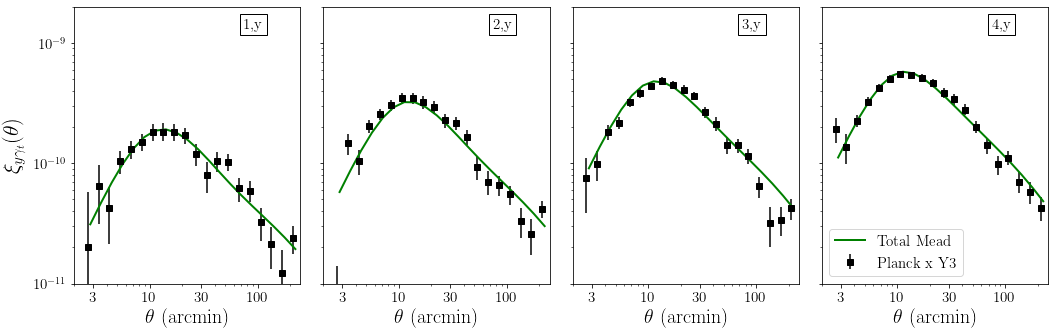

In [5]:
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (15,5),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
theta_array = DV.xi_result_dict['gty']['theta']
for j2 in range(4):
    bin_str = 'bin_' + str(j2+1) + '_' + str(0)


#     Cl_j1_1h = DV.xi_result_dict['gty'][bin_str]['1h']
#     Cl_j1_2h = DV.xi_result_dict['gty'][bin_str]['2h']
    Cl_j1_tot = DV.xi_result_dict['gty'][bin_str]['tot']
#     Cl_j1_tot2 = DV.xi_result_dict['gty'][bin_str]['tot2']

#     ax[j2].errorbar(theta_array, Cl_j1_1h, linestyle=':', marker='',lw = 2, color ='blue',label='1h')
#     ax[j2].errorbar(theta_array, Cl_j1_2h, linestyle=':', marker='',lw = 2, color ='red',label='2h Linear')
#     ax[j2].errorbar(theta_array, Cl_j1_1h + Cl_j1_2h, linestyle=':', marker='',lw = 2, color ='green',label='Total')  
#     ax[j2].errorbar(theta_array, Cl_j1_tot2, linestyle='-', marker='',lw = 2, color ='green',label='Total Mead2')  
    ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color ='green',label='Total Mead')  



    yk_g = df['Yshear_y3'][str(j2)]['xip']
    yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
    yk_err = df['Yshear_y3'][str(j2)]['err_p']
    ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label='Planck x Y3')

#     yk_g = df['Yshear_y1'][str(j2)]['xip']
#     yk_th_g = df['Yshear_y1'][str(j2)]['theta'] * 180./np.pi
#     yk_err = df['Yshear_y1'][str(j2)]['err_p']            
#     ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label='Y1')
    ax[j2].set_ylim(1e-11,2e-9)
    ax[j2].set_xscale('log')
    ax[j2].set_yscale('log')

    ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
    ticks  = np.array([3,10,30,100])
    labels_bottom = ticks
    ax[j2].set_xticks(ticks)
    ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

    ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j2].tick_params(axis='both', which='major', labelsize=15)
    ax[j2].set_xlim((2,250))
    ax[j2].text( 0.75, 0.96,str(j2+1) + ',y', verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


    jc += 1

# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_yk_kk_allbins.pdf')













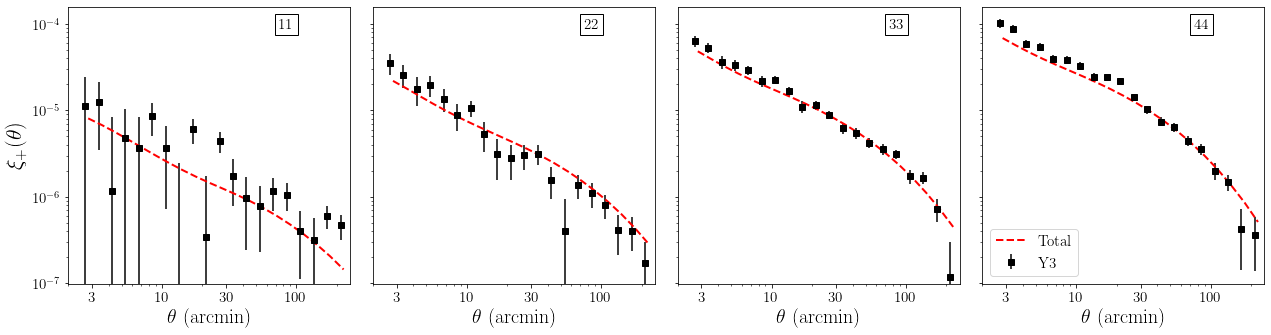

In [7]:
ntheta = len(df['shearshear_y3']['1_1']['theta'])
bins_array = [1,2,3,4]
# nbins = len([*df['shearshear_y3'].keys()])

nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (18,5),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
# theta_array = DV.xi_result_dict['kk']['theta']
for j2 in range(4):
    bin_str = 'bin_' + str(j2+1) + '_' + str(j2+1)
    sel_ind = np.where((bin1_xip == j2+1) & (bin2_xip == j2+1))[0]

#     Cl_j1_1h = DV.xi_result_dict['kk'][bin_str]['1h']
#     Cl_j1_2h = DV.xi_result_dict['kk'][bin_str]['2h']
    Cl_j1_tot = DV.xi_result_dict['kk'][bin_str]['tot']
#     Cl_j1_tot2 = DV.xi_result_dict['kk'][bin_str]['tot2']

#     ax[j2].errorbar(theta_array, Cl_j1_1h, linestyle='-', marker='',lw = 2, color ='blue',label='1h')
#     ax[j2].errorbar(theta_array, Cl_j1_2h, linestyle='-', marker='',lw = 2, color ='red',label='2h Linear')
#     ax[j2].errorbar(theta_array, Cl_j1_1h + Cl_j1_2h, linestyle=':', marker='',lw = 2, color ='green',label='Total')  
#     ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color ='blue',label='Total')  
    ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='--', marker='',lw = 2, color ='red',label='Total')  

#     ax[j2].errorbar(xip_ang[sel_ind], xip_csf[sel_ind], linestyle='-', marker='',lw = 2, color ='green',label='Cosmosis')  



    yk_g = df['shearshear_y3'][str(j2) + '_' + str(j2)]['xip']
    yk_th_g = df['shearshear_y3'][str(j2) + '_' + str(j2)]['theta'] * 180./np.pi
    yk_err = df['shearshear_y3'][str(j2) + '_' + str(j2)]['err_p']
    ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label='Y3')

#     yk_g = df['shearshear_y1'][str(j2) + '_' + str(j2)]['xip']
#     yk_th_g = df['shearshear_y1'][str(j2) + '_' + str(j2)]['theta'] * 180./np.pi
#     yk_err = df['shearshear_y1'][str(j2) + '_' + str(j2)]['err_p']            
#     ax[j2].errorbar(1.05*yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label='Y1')
#     ax[j2].set_ylim(1e-11,1e-9)
    ax[j2].set_xscale('log')
    ax[j2].set_yscale('log')

    ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
    ticks  = np.array([3,10,30,100])
    labels_bottom = ticks
    ax[j2].set_xticks(ticks)
    ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

    ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j2].tick_params(axis='both', which='major', labelsize=15)
    ax[j2].set_xlim((2,250))
    ax[j2].text( 0.75, 0.96,str(j2+1) + str(j2+1), verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


    jc += 1

# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{+}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_yk_kk_allbins.pdf')



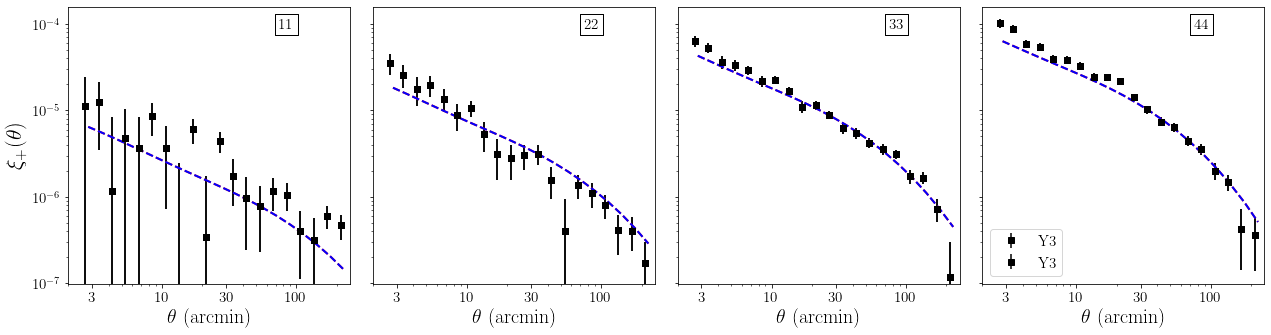

In [15]:
ntheta = len(df['shearshear_y3']['1_1']['theta'])
bins_array = [1,2,3,4]
# nbins = len([*df['shearshear_y3'].keys()])

nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (18,5),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
# theta_array = DV.xi_result_dict['kk']['theta']
ldir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
fnames = ['DV_obj_temp_gty_plancky3_beamed_P020.0_beta4.524.pk',
          'DV_obj_temp_gty_plancky3_beamed_P020.0_beta4.516.pk',
]
colors = ['r','b','k']
for jf in range(2):
    DV = dill.load(open(ldir + fnames[jf],'rb'))  
    for j2 in range(4):
        bin_str = 'bin_' + str(j2+1) + '_' + str(j2+1)
        sel_ind = np.where((bin1_xip == j2+1) & (bin2_xip == j2+1))[0]

    #     Cl_j1_1h = DV.xi_result_dict['kk'][bin_str]['1h']
    #     Cl_j1_2h = DV.xi_result_dict['kk'][bin_str]['2h']
        Cl_j1_tot = DV.xi_result_dict['kk'][bin_str]['tot']
    #     Cl_j1_tot2 = DV.xi_result_dict['kk'][bin_str]['tot2']

    #     ax[j2].errorbar(theta_array, Cl_j1_1h, linestyle='-', marker='',lw = 2, color ='blue',label='1h')
    #     ax[j2].errorbar(theta_array, Cl_j1_2h, linestyle='-', marker='',lw = 2, color ='red',label='2h Linear')
    #     ax[j2].errorbar(theta_array, Cl_j1_1h + Cl_j1_2h, linestyle=':', marker='',lw = 2, color ='green',label='Total')  
    #     ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color ='blue',label='Total')  
        ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='--', marker='',lw = 2, color =colors[jf])  

#         ax[j2].errorbar(xip_ang[sel_ind], xip_csf[sel_ind], linestyle='-', marker='',lw = 2, color ='green',label='Cosmosis')  



        yk_g = df['shearshear_y3'][str(j2) + '_' + str(j2)]['xip']
        yk_th_g = df['shearshear_y3'][str(j2) + '_' + str(j2)]['theta'] * 180./np.pi
        yk_err = df['shearshear_y3'][str(j2) + '_' + str(j2)]['err_p']
        ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label='Y3')

    #     yk_g = df['shearshear_y1'][str(j2) + '_' + str(j2)]['xip']
    #     yk_th_g = df['shearshear_y1'][str(j2) + '_' + str(j2)]['theta'] * 180./np.pi
    #     yk_err = df['shearshear_y1'][str(j2) + '_' + str(j2)]['err_p']            
    #     ax[j2].errorbar(1.05*yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label='Y1')
    #     ax[j2].set_ylim(1e-11,1e-9)
        ax[j2].set_xscale('log')
        ax[j2].set_yscale('log')

        ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
        ticks  = np.array([3,10,30,100])
        labels_bottom = ticks
        ax[j2].set_xticks(ticks)
        ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
        ax[j2].set_xlim((2,250))
        ax[j2].text( 0.75, 0.96,str(j2+1) + str(j2+1), verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


        jc += 1

    # ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
    ax[0].set_ylabel(r'$\xi_{+}(\theta)$ ', size = 22)
    # ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
    # ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
    ax[3].legend(fontsize=15,loc='lower left')
    #     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



    pl.tight_layout()

    # fig.savefig('xi_yk_kk_allbins.pdf')




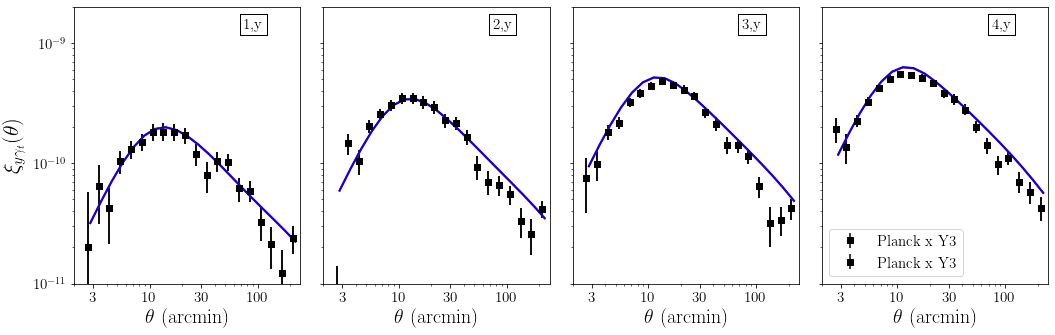

In [16]:
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (15,5),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
theta_array = DV.xi_result_dict['gty']['theta']
for jf in range(2):
    DV = dill.load(open(ldir + fnames[jf],'rb'))  


    for j2 in range(4):
        bin_str = 'bin_' + str(j2+1) + '_' + str(0)


    #     Cl_j1_1h = DV.xi_result_dict['gty'][bin_str]['1h']
    #     Cl_j1_2h = DV.xi_result_dict['gty'][bin_str]['2h']
        Cl_j1_tot = DV.xi_result_dict['gty'][bin_str]['tot']
    #     Cl_j1_tot2 = DV.xi_result_dict['gty'][bin_str]['tot2']

    #     ax[j2].errorbar(theta_array, Cl_j1_1h, linestyle=':', marker='',lw = 2, color ='blue',label='1h')
    #     ax[j2].errorbar(theta_array, Cl_j1_2h, linestyle=':', marker='',lw = 2, color ='red',label='2h Linear')
    #     ax[j2].errorbar(theta_array, Cl_j1_1h + Cl_j1_2h, linestyle=':', marker='',lw = 2, color ='green',label='Total')  
    #     ax[j2].errorbar(theta_array, Cl_j1_tot2, linestyle='-', marker='',lw = 2, color ='green',label='Total Mead2')  
        ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color =colors[jf])  



        yk_g = df['Yshear_y3'][str(j2)]['xip']
        yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
        yk_err = df['Yshear_y3'][str(j2)]['err_p']
        ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label='Planck x Y3')

    #     yk_g = df['Yshear_y1'][str(j2)]['xip']
    #     yk_th_g = df['Yshear_y1'][str(j2)]['theta'] * 180./np.pi
    #     yk_err = df['Yshear_y1'][str(j2)]['err_p']            
    #     ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label='Y1')
        ax[j2].set_ylim(1e-11,2e-9)
        ax[j2].set_xscale('log')
        ax[j2].set_yscale('log')

        ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
        ticks  = np.array([3,10,30,100])
        labels_bottom = ticks
        ax[j2].set_xticks(ticks)
        ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
        ax[j2].set_xlim((2,250))
        ax[j2].text( 0.75, 0.96,str(j2+1) + ',y', verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


        jc += 1

    # ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
    ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
    # ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
    # ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
    ax[3].legend(fontsize=15,loc='lower left')
    #     ax[1,j].tick_params(axis='both', which='major', labelsize=15)

    pl.tight_layout()

    # fig.savefig('xi_yk_kk_allbins.pdf')



In [20]:
yd1


array([ 2.01409531e-11,  6.42683466e-11,  4.22088519e-11,  1.04127166e-10,
        1.31343923e-10,  1.51133269e-10,  1.83252630e-10,  1.83105547e-10,
        1.83398396e-10,  1.70376737e-10,  1.19637141e-10,  7.99530986e-11,
        1.04227007e-10,  1.02962387e-10,  6.17922684e-11,  5.91808160e-11,
        3.26581066e-11,  2.13237356e-11,  1.23411447e-11,  2.38760292e-11,
       -2.62359145e-11,  1.46068990e-10,  1.04111398e-10,  2.02872042e-10,
        2.56933773e-10,  3.03644347e-10,  3.45267765e-10,  3.47107260e-10,
        3.22238719e-10,  2.92885417e-10,  2.26959240e-10,  2.14842003e-10,
        1.66661149e-10,  9.35029876e-11,  7.01648821e-11,  6.54825797e-11,
        5.53270824e-11,  3.32680197e-11,  2.59230104e-11,  4.19065536e-11,
        7.48868375e-11,  9.90713673e-11,  1.81854408e-10,  2.17550695e-10,
        3.20664897e-10,  3.81216612e-10,  4.39706510e-10,  4.83859039e-10,
        4.51225718e-10,  4.08669964e-10,  3.62158602e-10,  2.65542226e-10,
        2.12458864e-10,  

No handles with labels found to put in legend.


-107.53412358842309
-107.12715220290043


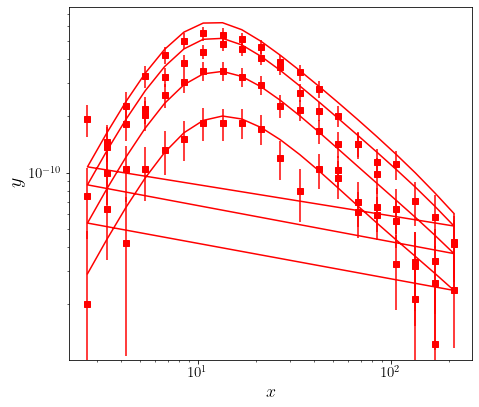

In [34]:
t1 = np.load('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/temp_1.npz')
t2 = np.load('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/temp_2.npz')

x1, yd1, yt1, sig1 = t1['xdata'], t1['ydata'], t1['yth'], np.sqrt(np.diag(np.linalg.inv(t1['invcov'])))
v1 = -0.5 * np.dot(np.dot(np.transpose((yd1 - yt1)), t1['invcov']),(yd1 - yt1))   
print(v1)
x2, yd2, yt2, sig2 = t2['xdata'], t2['ydata'], t2['yth'], np.sqrt(np.diag(np.linalg.inv(t2['invcov'])))
v2 = -0.5 * np.dot(np.dot(np.transpose((yd2 - yt2)), t2['invcov']),(yd2 - yt2))   
print(v2)


fig, ax = pl.subplots(1,1, figsize = (7,6))

ax.errorbar(x1.flatten(),yd1,sig1,ls='',marker='s',color='r')
ax.errorbar(x1.flatten(),yt1,ls='-',marker='',color='r')

# ax.errorbar(x2.flatten(),yd2,sig2,ls='',marker='s',color='b')
# ax.errorbar(x2.flatten(),yt2,ls='-',marker='',color='b')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$x$', size = 18)
ax.set_ylabel(r'$y$', size = 20)
# ax.set_ylim(1e-5,3e4)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()


In [33]:
2+2




4

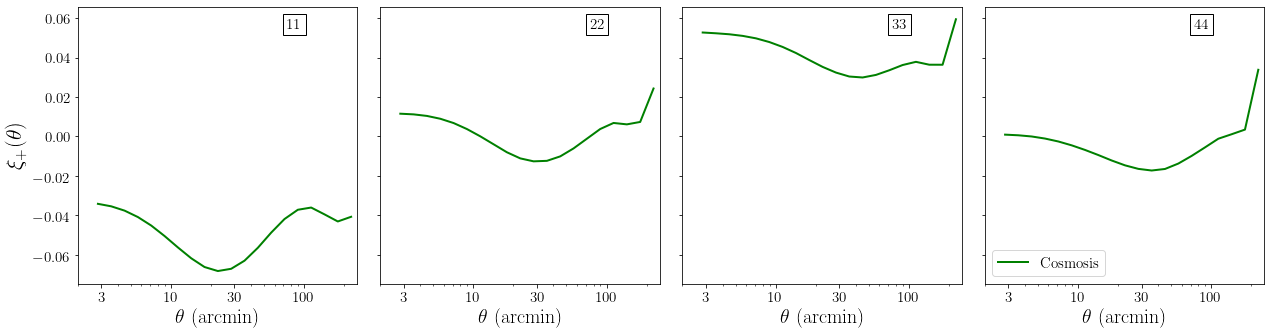

In [32]:
import scipy.interpolate as interpolate
ntheta = len(df['shearshear_y3']['1_1']['theta'])
bins_array = [1,2,3,4]
# nbins = len([*df['shearshear_y3'].keys()])

nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (18,5),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
# theta_array = DV.xi_result_dict['kk']['theta']
for j2 in range(4):
    bin_str = 'bin_' + str(j2+1) + '_' + str(j2+1)
    sel_ind = np.where((bin1_xip == j2+1) & (bin2_xip == j2+1))[0]

#     Cl_j1_1h = DV.xi_result_dict['kk'][bin_str]['1h']
#     Cl_j1_2h = DV.xi_result_dict['kk'][bin_str]['2h']
    Cl_j1_tot = DV.xi_result_dict['kk'][bin_str]['tot']
    Cl_j1_tot2 = DV.xi_result_dict['kk'][bin_str]['tot2']
    Cl_interp = interpolate.interp1d(theta_array,np.log(Cl_j1_tot2),fill_value='extrapolate')
    Cl_cs = np.exp(Cl_interp(xip_ang[sel_ind]))

#     ax[j2].errorbar(theta_array, Cl_j1_1h, linestyle='-', marker='',lw = 2, color ='blue',label='1h')
#     ax[j2].errorbar(theta_array, Cl_j1_2h, linestyle='-', marker='',lw = 2, color ='red',label='2h Linear')
#     ax[j2].errorbar(theta_array, Cl_j1_1h + Cl_j1_2h, linestyle=':', marker='',lw = 2, color ='green',label='Total')  
#     ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color ='blue',label='Total')  
#     ax[j2].errorbar(theta_array, Cl_j1_tot2, linestyle='--', marker='',lw = 2, color ='red',label='Total')  

    ax[j2].errorbar(xip_ang[sel_ind], (Cl_cs - xip_csf[sel_ind])/(xip_csf[sel_ind] ), linestyle='-', marker='',lw = 2, color ='green',label='Cosmosis')  



    yk_g = df['shearshear_y3'][str(j2) + '_' + str(j2)]['xip']
    yk_th_g = df['shearshear_y3'][str(j2) + '_' + str(j2)]['theta'] * 180./np.pi
    yk_err = df['shearshear_y3'][str(j2) + '_' + str(j2)]['err_p']
#     ax[j2].errorbar(yk_th_g, (yk_g - xip_csf[sel_ind])/(xip_csf[sel_ind]),yerr=yk_err/xip_csf[sel_ind], ls='',marker='s',color='black',label='Y3')

#     yk_g = df['shearshear_y1'][str(j2) + '_' + str(j2)]['xip']
#     yk_th_g = df['shearshear_y1'][str(j2) + '_' + str(j2)]['theta'] * 180./np.pi
#     yk_err = df['shearshear_y1'][str(j2) + '_' + str(j2)]['err_p']            
#     ax[j2].errorbar(1.05*yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label='Y1')
#     ax[j2].set_ylim(1e-11,1e-9)
    ax[j2].set_xscale('log')
#     ax[j2].set_yscale('log')

    ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
    ticks  = np.array([3,10,30,100])
    labels_bottom = ticks
    ax[j2].set_xticks(ticks)
    ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

    ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j2].tick_params(axis='both', which='major', labelsize=15)
    ax[j2].set_xlim((2,250))
    ax[j2].text( 0.75, 0.96,str(j2+1) + str(j2+1), verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


    jc += 1

# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{+}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_yk_kk_allbins.pdf')







In [46]:
pkmm_yx = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/compare_pkmm_cs_yx_wdndm_wmead.pk','rb'))
pkmm_yx.keys()



dict_keys(['k', 'z', 'Pk1h', 'Pk2h', 'Pktot', 'Pk1h_block', 'z_bl', 'k_bl', 'Pk1h_cs', 'Pk2h_cs', 'Pktot_cs', 'dndm', 'nu', 'M', 'gnu'])

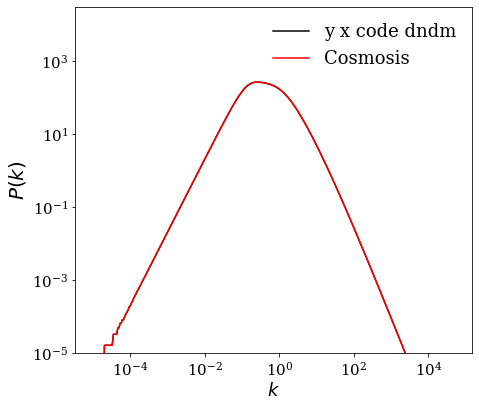

In [47]:
from scipy import interpolate
zv = 0.2
ind_zv_yx = np.where(pkmm_yx['z'] > zv)[0][0]
ind_zv_cs = np.where(pkmm_yx['z_bl'] > zv)[0][0]


Pk1h_cs_interp = interpolate.interp1d(pkmm_yx['k_bl'],pkmm_yx['Pk1h_cs'][ind_zv_cs,:])
Pk2h_cs_interp = interpolate.interp1d(pkmm_yx['k_bl'],pkmm_yx['Pk2h_cs'][ind_zv_cs,:])



fig, ax = pl.subplots(1,1, figsize = (7,6))

# ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk2h'][ind_zv_yx,:],ls='--',marker='',elinewidth=2.0,color='blue')
# ax.errorbar(pkmm_yx['k'],Pk2h_cs_interp(pkmm_yx['k']),ls='-',marker='',elinewidth=2.0,color='red')


ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk1h'][ind_zv_yx,:],label=r'y x code dndm',ls='-',marker='',elinewidth=2.0,color='black')
# ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk1h_block'][ind_zv_yx,:],label=r'y x code',ls='--',marker='',elinewidth=2.0,color='blue')
ax.errorbar(pkmm_yx['k'],Pk1h_cs_interp(pkmm_yx['k']),label=r'Cosmosis',ls='-',marker='',elinewidth=2.0,color='red')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$k$', size = 18)
ax.set_ylabel(r'$P(k)$', size = 20)
ax.set_ylim(1e-5,3e4)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()




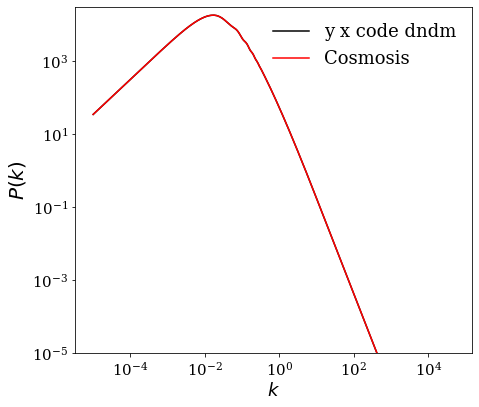

In [48]:
from scipy import interpolate
zv = 0.2
ind_zv_yx = np.where(pkmm_yx['z'] > zv)[0][0]
ind_zv_cs = np.where(pkmm_yx['z_bl'] > zv)[0][0]


Pk1h_cs_interp = interpolate.interp1d(pkmm_yx['k_bl'],pkmm_yx['Pk1h_cs'][ind_zv_cs,:])
Pk2h_cs_interp = interpolate.interp1d(pkmm_yx['k_bl'],pkmm_yx['Pk2h_cs'][ind_zv_cs,:])

fig, ax = pl.subplots(1,1, figsize = (7,6))

ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk2h'][ind_zv_yx,:],label=r'y x code dndm',ls='-',marker='',elinewidth=2.0,color='black')
ax.errorbar(pkmm_yx['k'],Pk2h_cs_interp(pkmm_yx['k']),label=r'Cosmosis',ls='-',marker='',elinewidth=2.0,color='red')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$k$', size = 18)
ax.set_ylabel(r'$P(k)$', size = 20)
ax.set_ylim(1e-5,3e4)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()






In [90]:
sige = np.array([0.247, 0.266, 0.263, 0.314])
neff = np.array([ 1.476, 1.479, 1.484, 1.461])
arcmin2rad = (1./60.)*(np.pi/180.)
noisek = 2.*((sige**2)/(neff))*(arcmin2rad**2)




In [91]:
print(noisek)



[6.99503318e-09 8.09612732e-09 7.88787148e-09 1.14206628e-08]


In [103]:
DV.covtot_dict.keys()



dict_keys(['ky_ky', 'ky_kk', 'kk_kk'])

In [47]:
DV.covtot_dict['gty_gty'].keys()



KeyError: 'gty_gty'

In [48]:
DV.fftcovtot_dict['gty_kk'].keys()



dict_keys(['bin_1_0_1_1', 'theta', 'bin_1_0_1_2', 'bin_1_0_1_3', 'bin_1_0_1_4', 'bin_1_0_2_2', 'bin_1_0_2_3', 'bin_1_0_2_4', 'bin_1_0_3_3', 'bin_1_0_3_4', 'bin_1_0_4_4', 'bin_2_0_1_1', 'bin_2_0_1_2', 'bin_2_0_1_3', 'bin_2_0_1_4', 'bin_2_0_2_2', 'bin_2_0_2_3', 'bin_2_0_2_4', 'bin_2_0_3_3', 'bin_2_0_3_4', 'bin_2_0_4_4', 'bin_3_0_1_1', 'bin_3_0_1_2', 'bin_3_0_1_3', 'bin_3_0_1_4', 'bin_3_0_2_2', 'bin_3_0_2_3', 'bin_3_0_2_4', 'bin_3_0_3_3', 'bin_3_0_3_4', 'bin_3_0_4_4', 'bin_4_0_1_1', 'bin_4_0_1_2', 'bin_4_0_1_3', 'bin_4_0_1_4', 'bin_4_0_2_2', 'bin_4_0_2_3', 'bin_4_0_2_4', 'bin_4_0_3_3', 'bin_4_0_3_4', 'bin_4_0_4_4', 'bins_comb'])

In [53]:
DV.fftcovtot_dict['kk_kk'].keys()


dict_keys(['bin_1_1_1_1', 'theta', 'bin_1_1_1_2', 'bin_1_1_1_3', 'bin_1_1_1_4', 'bin_1_1_2_2', 'bin_1_1_2_3', 'bin_1_1_2_4', 'bin_1_1_3_3', 'bin_1_1_3_4', 'bin_1_1_4_4', 'bin_1_2_1_1', 'bin_1_2_1_2', 'bin_1_2_1_3', 'bin_1_2_1_4', 'bin_1_2_2_2', 'bin_1_2_2_3', 'bin_1_2_2_4', 'bin_1_2_3_3', 'bin_1_2_3_4', 'bin_1_2_4_4', 'bin_1_3_1_1', 'bin_1_3_1_2', 'bin_1_3_1_3', 'bin_1_3_1_4', 'bin_1_3_2_2', 'bin_1_3_2_3', 'bin_1_3_2_4', 'bin_1_3_3_3', 'bin_1_3_3_4', 'bin_1_3_4_4', 'bin_1_4_1_1', 'bin_1_4_1_2', 'bin_1_4_1_3', 'bin_1_4_1_4', 'bin_1_4_2_2', 'bin_1_4_2_3', 'bin_1_4_2_4', 'bin_1_4_3_3', 'bin_1_4_3_4', 'bin_1_4_4_4', 'bin_2_2_1_1', 'bin_2_2_1_2', 'bin_2_2_1_3', 'bin_2_2_1_4', 'bin_2_2_2_2', 'bin_2_2_2_3', 'bin_2_2_2_4', 'bin_2_2_3_3', 'bin_2_2_3_4', 'bin_2_2_4_4', 'bin_2_3_1_1', 'bin_2_3_1_2', 'bin_2_3_1_3', 'bin_2_3_1_4', 'bin_2_3_2_2', 'bin_2_3_2_3', 'bin_2_3_2_4', 'bin_2_3_3_3', 'bin_2_3_3_4', 'bin_2_3_4_4', 'bin_2_4_1_1', 'bin_2_4_1_2', 'bin_2_4_1_3', 'bin_2_4_1_4', 'bin_2_4_2_2', 'bin_

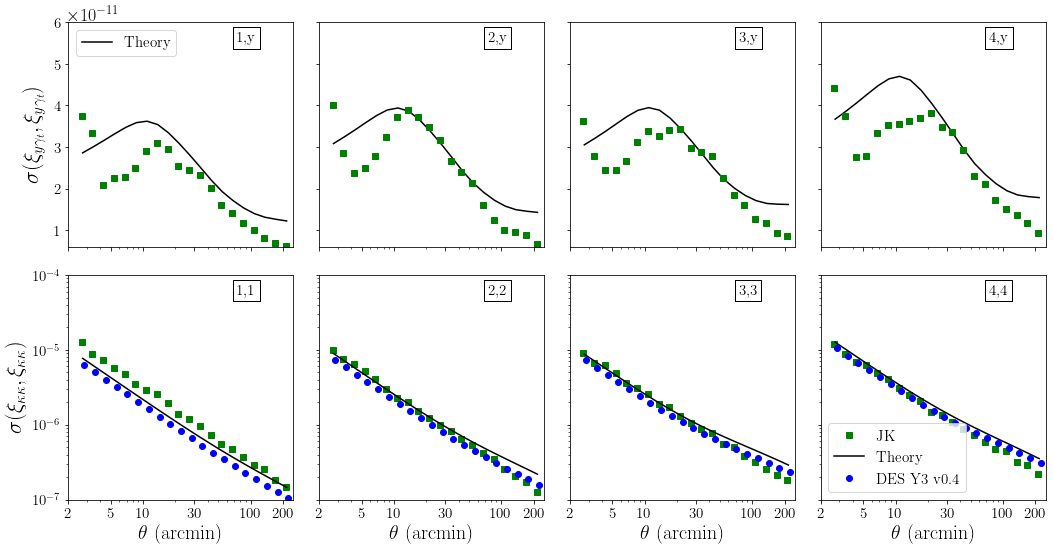

In [10]:
from twobessel import *
import matplotlib.pyplot as plt

def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))

import pickle as pk
import numpy as np
try:
    df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'))
except:
    df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'),encoding='latin1')


theta_arr = DV.fftcovtot_dict['kk_kk']['theta']

from astropy.io import fits
desy1 = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/v0.40_fiducial.fits')

nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(2,4, figsize = (15,8),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):
        
        bin1 = desy1['xip'].data['BIN1']
        bin2 = desy1['xip'].data['BIN2']
        ind_sel = np.where((bin1 == bins[j2]) & (bin2 == bins[j2]))[0]
        
        ind_sel1 = np.where((bin1 == bins[j2]))[0]
        ind_sel2 = np.where((bin2 == bins[j2]))[0]
        data_val = desy1['xip'].data['VALUE'][ind_sel]
        data_ang = desy1['xip'].data['ANG'][ind_sel]
        cov = desy1['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]
#         sig = np.sqrt(np.diag(cov[ind_sel1,:][:,ind_sel2]))
        sig = np.sqrt(np.diag(cov))

        if j1 == 0:
            cov_kk_binj2 = DV.fftcovtot_dict['gty_gty']['bin_' + str(j2+1) + '_' + str(0) + '_' + str(j2+1) + '_' + str(0)]
            sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
            ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
            ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color='k',label='Theory')


            
#             if isodd:
#                 cov_total = block_res['covg_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])][:-1,:][:,:-1]
#             else:
#                 cov_total = block_res['covg_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
#             newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
#             t1, t2, cov_fft = newtwobessel.two_Bessel_binave(2,2,dlnk,dlnk)
#             ax[j1,j2].plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.sqrt(np.diag(cov_fft)[:-1]), ls='--',color='k',label='Gaussian')
            
            
#             if isodd:
#                 cov_total = block_res['covng_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])][:-1,:][:,:-1]
#             else:
#                 cov_total = block_res['covng_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
#             newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
#             t1, t2, cov_fft = newtwobessel.two_Bessel_binave(2,2,dlnk,dlnk)
#             ax[j1,j2].plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.sqrt(np.diag(cov_fft)[:-1]), ls=':',color='k',label='Non-Gaussian')
            
            yk_g = df['Yshear_y3'][str(j2)]['xip']
            yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y3'][str(j2)]['err_p']
            
#             yk_cov = df['Yshear_y1'][str(j2)]['cov']
#             inv_cov_bin = QR_inverse(yk_cov)
#             snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
#             print('SNR y-gt bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            
            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green')
            ax[j1,j2].set_ylim(6e-12,6e-11)
            
            
            
        if j1 == 1:
            yk_g = df['shearshear_y3'][str(j2)+'_'+str(j2)]['xip']
            yk_th_g = df['shearshear_y3'][str(j2)+'_'+str(j2)]['theta'] * 180. /np.pi
            yk_err = df['shearshear_y3'][str(j2)+'_'+str(j2)]['err_p']
#             ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='o',color='blue',label='DES Y1')
            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green',label='JK')
            

            cov_kk_binj2 = DV.fftcovtot_dict['kk_kk']['bin_' + str(j2+1) + '_' + str(j2+1) + '_' + str(j2+1) + '_' + str(j2+1)]
            sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
            ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
            ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color='k',label='Theory')



            
#             if isodd:
#                 cov_total = block_res['covg_kk_kk_bin_' + str(bins[j2]) + '_' + str(bins[j2])][:-1,:][:,:-1]
#             else:
#                 cov_total = block_res['covg_kk_kk_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
#             newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
#             t1, t2, cov_fft = newtwobessel.two_Bessel_binave(0,0,dlnk,dlnk)
#             ax[j1,j2].plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.sqrt(np.diag(cov_fft)[:-1]), ls='--',color='k')
            
            
#             if isodd:
#                 cov_total = block_res['covng_kk_kk_bin_' + str(bins[j2]) + '_' + str(bins[j2])][:-1,:][:,:-1]
#             else:
#                 cov_total = block_res['covng_kk_kk_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
#             newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
#             t1, t2, cov_fft = newtwobessel.two_Bessel_binave(0,0,dlnk,dlnk)
#             ax[j1,j2].plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.sqrt(np.diag(cov_fft)[:-1]), ls=':',color='k')
            
            
            ax[j1,j2].plot(data_ang, sig, ls='',marker='o',color='blue',label='DES Y3 v0.4')
            ax[j1,j2].set_ylim(1e-7,1e-4)


#             ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='s',color='green',label='DES Y1')
            
        ax[j1,j2].set_xscale('log')
        if j1 == 1:
            ax[j1,j2].set_yscale('log')
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,5,10,30,100,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((2,250))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\sigma(\xi_{y\gamma_t},\xi_{y\gamma_t})$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\sigma(\xi_{\kappa \kappa},\xi_{\kappa \kappa})$ ', size = 22)
ax[1,3].legend(fontsize=15,loc='lower left')
ax[0,0].legend(fontsize=15,loc='upper left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_ygt_kk_allbins_sigma_comp.pdf')






In [24]:
twoptf = pk.load(open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/planck_desy3_kk_gty_reformat_autobinonly_cov_theory_25_6_20.pk','rb'))  
twoptf.keys()



dict_keys(['xcoord_all', 'mean', 'cov_total'])

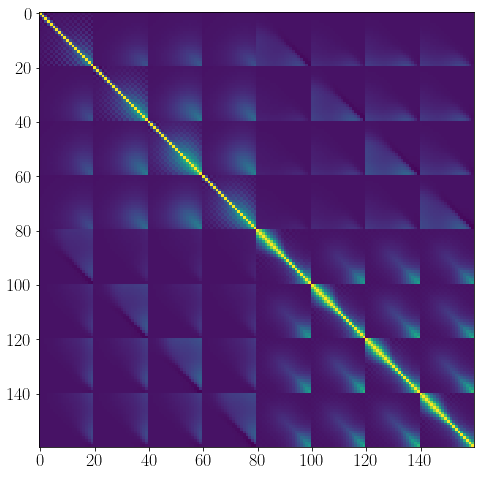

In [27]:
def get_corr(cov):
    corr = np.zeros(cov.shape)
    for ii in range(0, cov.shape[0]):
        for jj in range(0, cov.shape[1]):
            corr[ii, jj] = cov[ii, jj] / np.sqrt(cov[ii, ii] * cov[jj, jj])
    return corr

pl.figure( figsize = (12,8))
# pl.imshow(np.log(np.abs(twoptf['cov_total'])))
pl.imshow(get_corr((twoptf['cov_total'])))



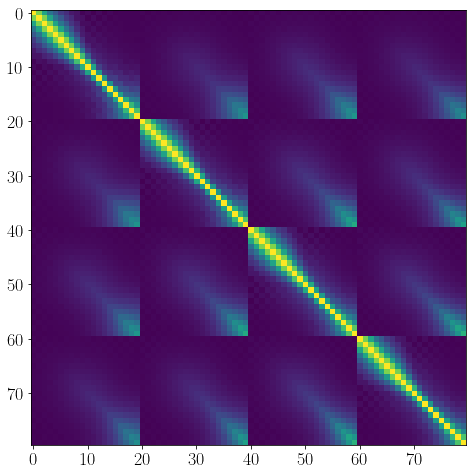

In [26]:
def get_corr(cov):
    corr = np.zeros(cov.shape)
    for ii in range(0, cov.shape[0]):
        for jj in range(0, cov.shape[1]):
            corr[ii, jj] = cov[ii, jj] / np.sqrt(cov[ii, ii] * cov[jj, jj])
    return corr

pl.figure( figsize = (12,8))
# pl.imshow(np.log(np.abs(twoptf['cov_total'])))
pl.imshow(get_corr((twoptf['cov_total'][80:,:][:,80:])))






Text(0.5, 1.0, '$\\mathcal{C}(\\langle \\gamma_t y \\rangle,\\langle \\gamma_t y \\rangle)$')

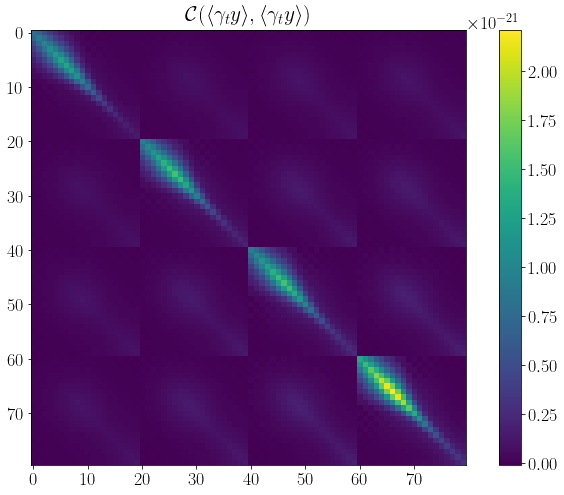

In [74]:
def get_corr(cov):
    corr = np.zeros(cov.shape)
    for ii in range(0, cov.shape[0]):
        for jj in range(0, cov.shape[1]):
            corr[ii, jj] = cov[ii, jj] / np.sqrt(cov[ii, ii] * cov[jj, jj])
    return corr

pl.figure( figsize = (12,8))
# pl.imshow(np.log(np.abs(twoptf['cov_total'])))
pl.imshow(((twoptf['cov_total'][80:,:][:,80:])))
pl.colorbar()
pl.title(r'$\mathcal{C}(\langle \gamma_t y \rangle,\langle \gamma_t y \rangle)$')






In [1]:
import matplotlib
from getdist import plots, MCSamples
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
import pdb

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True



/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  if __name__ == '__main__':


In [2]:
def get_nsample(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#nsample="):
                nsamples = int(ln[9:])
    return nsamples

def get_evidence(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#log_z="):
                logz = float(ln[7:])
    return logz

# def get_param_names(filename):
#     with open(filename,"r") as fi:
#         param_names = np.array((fi.readline()[1:].split())[:-4])
#     print param_names
#     return param_names


def get_param_names(filename):
    with open(filename,"r") as fi:
        param_names = np.array((fi.readline()[1:].split()))
#     print param_names
    return param_names


def get_S8(data, names, Omega_m_name = 'cosmological_parameters--omega_m', sigma_8_name = 'COSMOLOGICAL_PARAMETERS--SIGMA_8', alpha=0.5):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_m_name]):
            Omega_m_ind = ii
        if (names[ii] in [sigma_8_name]):
            sig8_ind = ii
    sigma_8 = data[:,sig8_ind]
    omega_m = data[:,Omega_m_ind]
    s8 = sigma_8 * (omega_m/0.3)**alpha
    return s8


def get_Obh2(data, names, Omega_b_name = 'cosmological_parameters--omega_b', h_name = 'cosmological_parameters--h0'):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_b_name]):
            Omega_b_ind = ii
        if (names[ii] in [h_name]):
            h_ind = ii
    h0 = data[:,h_ind]
    omega_b = data[:,Omega_b_ind]
    return omega_b * (h0**2)

def get_Omh3(data, names, Omega_m_name = 'cosmological_parameters--omega_m', h_name = 'cosmological_parameters--h0'):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_m_name]):
            Omega_m_ind = ii
        if (names[ii] in [h_name]):
            h_ind = ii
    h0 = data[:,h_ind]
    omega_m = data[:,Omega_m_ind]
    return omega_m * (h0**3)

def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
    return np.array(output_names), np.array(ind_data)


s8v = 0.82355 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.82355,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97}    
stat_vars = ['cosmological_parameters--omega_m','COSMOLOGICAL_PARAMETERS--SIGMA_8','cosmological_parameters--s8']
def get_mean_std_tension(fname, param_names=stat_vars, truth_dict=marker_dict):
    sf_name = open(fname, 'r')
    lines_all = sf_name.readlines()
    lines = lines_all[3:]
    mean_std = {}
    for j1 in range(len(param_names)):
        for i1 in range(len(lines)):
            first_line = lines[i1]
            first_line_split = first_line.split()
            sec_var = first_line_split[0]
            if sec_var == param_names[j1]:
                mean_std[sec_var] = np.array([float(first_line_split[1]),float(first_line_split[2])])
    out_dic = {}
    for param in param_names:
        mean, std = mean_std[param][0],mean_std[param][1]
        tension = np.abs(mean - truth_dict[param])/std
        out_dic[param] = tension
    
    return mean_std,out_dic

def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
    return np.array(output_names), np.array(ind_data)




[[ 7.73757218e-01  4.84898719e-01  2.01025263e+01  4.70721489e+00
  -5.08759634e+00 -1.04010114e+02 -1.09097711e+02  1.42702470e-03]]
Removed no burn in
nsamp  =  462
data shape =  (462, 4)
weights shape =  (462,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--p0-a_m--0' 'theory_yx--beta-a_m--0']
param names fancy =  ['$A_{\\rm hm}$' '$\\eta_{\\rm hm}$' '$P_0(A)$' '$\\beta(A)$']
[[ 7.82239891e-01  5.90495751e-02  1.02710575e+01  4.01165948e+00
  -5.08759634e+00 -1.77259856e+02 -1.82347453e+02  1.45135296e-03]]
Removed no burn in
nsamp  =  597
data shape =  (597, 4)
weights shape =  (597,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--p0-a_m--0' 'theory_yx--beta-a_m--0']
param names fancy =  ['$A_{\\rm hm}$' '$\\eta_{\\rm hm}$' '$P_0(A)$' '$\\beta(A)$']


<Figure size 1152x864 with 0 Axes>

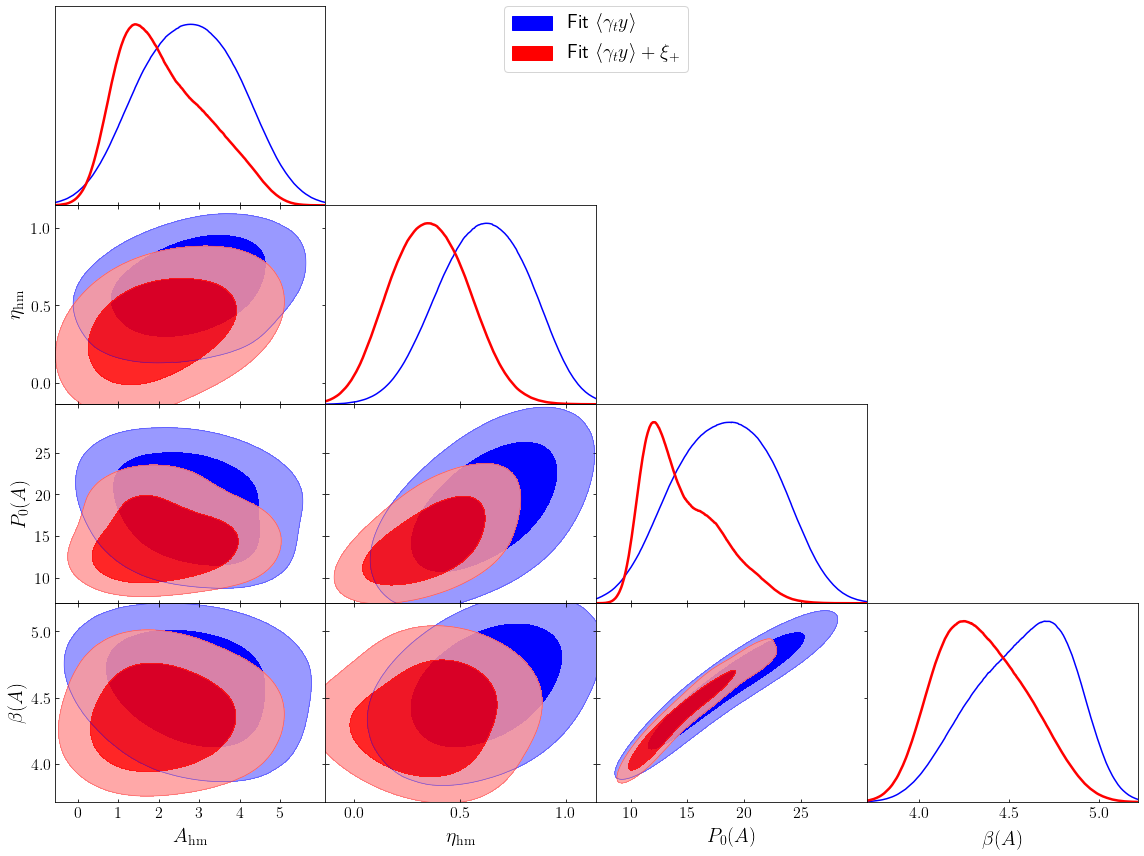

In [3]:
filename_list = ['/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckxdesy3_grid_v0p4_P0beta_narrow_gtyonly_corr.txt',  
                 '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckxdesy3_grid_v0p4_P0beta_narrow_kkgtyonly_corr.txt'
]     
legend_labels = ['Fit ' +  r'$\langle \gamma_t y \rangle$','Fit ' +  r'$\langle \gamma_t y \rangle + \xi_{+}$']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
    nsample = get_nsample(filename)
    data = np.loadtxt(filename)[-nsample:,:]
    weights = np.loadtxt(filename)[-nsample:,-1]
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = np.loadtxt(filename)[-nsample:,-3]
    ind_max = np.where(likef == np.amax(likef))[0]
    print(data[ind_max,:])
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy)
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =16)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,True], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

# g.export(fname = 'compare_cosmo_extprior_44_NLbiasDV.pdf')






In [15]:
fname = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckxdesy3_gridtrue_v0p4_P0beta_only.txt'
df = np.loadtxt(fname)

p1 = df[:,0]
p2 = df[:,1]
post = df[:,-1]





In [29]:
ind_sel = np.where((p1 > 16.2) & (p1 < 16.4))[0]
print(p2[ind_sel])
ind_sel2 = np.where(p2[ind_sel] > 4.35)[0][0]
post[ind_sel][ind_sel2]


[4.         4.01010101 4.02020202 4.03030303 4.04040404 4.05050505
 4.06060606 4.07070707 4.08080808 4.09090909 4.1010101  4.11111111
 4.12121212 4.13131313 4.14141414 4.15151515 4.16161616 4.17171717
 4.18181818 4.19191919 4.2020202  4.21212121 4.22222222 4.23232323
 4.24242424 4.25252525 4.26262626 4.27272727 4.28282828 4.29292929
 4.3030303  4.31313131 4.32323232 4.33333333 4.34343434 4.35353535
 4.36363636 4.37373737 4.38383838 4.39393939 4.4040404  4.41414141
 4.42424242 4.43434343 4.44444444 4.45454545 4.46464646 4.47474747
 4.48484848 4.49494949 4.50505051 4.51515152 4.52525253 4.53535354
 4.54545455 4.55555556 4.56565657 4.57575758 4.58585859 4.5959596
 4.60606061 4.61616162 4.62626263 4.63636364 4.64646465 4.65656566
 4.66666667 4.67676768 4.68686869 4.6969697  4.70707071 4.71717172
 4.72727273 4.73737374 4.74747475 4.75757576 4.76767677 4.77777778
 4.78787879 4.7979798  4.80808081 4.81818182 4.82828283 4.83838384
 4.84848485 4.85858586 4.86868687 4.87878788 4.88888889 4.89898

-291.9595092586844

In [30]:
p1[ind_sel][ind_sel2], p2[ind_sel][ind_sel2], post[ind_sel][ind_sel2]




(16.363636363636367, 4.353535353535354, -291.9595092586844)

In [45]:
ind_m = np.where(post == np.amax(post))[0]
print(p1[ind_m], p2[ind_m])




[1.71414141] [2.34343434]


In [48]:
np.amin(-2.*post/80.)


3.5643850486262814

(3.0, 6.0)

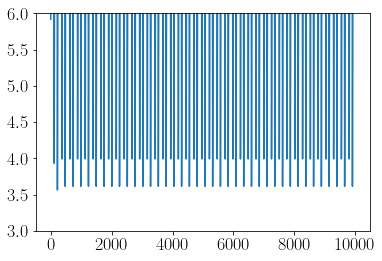

In [50]:
pl.figure()
pl.plot(-2.*post/80.)
# pl.yscale('log')
pl.ylim(3.0,6.0)






In [10]:
post_arr = np.loadtxt(filename)[-nsample:,-3]



In [11]:
np.amin(post_arr)




-105.15301282276585

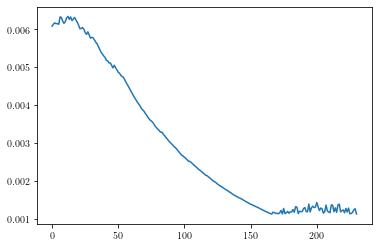

In [6]:
pl.figure()
pl.plot(post_arr)




In [36]:
np.amax(post_arr)


-1375.803843209699

In [37]:
a1 = np.arange(100)
a1[2::10]


array([ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92])

In [40]:
np.loadtxt(filename)[-nsample:,-1][3::250]



array([-196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648

In [25]:
(np.loadtxt(filename)[-nsample:,2][6::250])




array([21.83550299, 21.83550299, 21.83550299, 21.83550299, 21.83550299,
       21.83550299, 21.83550299, 21.83550299, 21.83550299, 24.27313135,
       24.27313135, 24.27313135, 24.27313135, 24.27313135, 24.27313135,
       24.27313135, 24.27313135, 24.27313135, 24.27313135, 24.27313135,
       24.27313135, 24.27313135, 24.27313135, 24.14328863, 24.14328863,
       24.14328863, 24.14328863, 37.26403154, 37.26403154, 37.26403154,
       37.26403154, 37.26403154, 37.26403154, 35.12137506, 35.12137506,
       35.12137506, 35.12137506, 35.12137506, 35.35464798, 35.35464798,
       35.35464798, 38.83346837, 42.54988277, 42.54988277, 28.56438745,
       28.56438745, 28.56438745, 28.56438745, 27.73183827, 27.73183827,
       27.73183827, 27.73183827, 27.73183827, 23.40080101, 23.22293149,
       23.22293149, 23.22293149, 21.04893752, 21.04893752, 20.20793402,
       20.25147406, 23.05780746, 23.05780746, 23.05780746, 23.05780746,
       23.05780746, 23.05780746, 23.05780746, 23.05780746, 23.05

In [27]:
ind_big = np.where(np.loadtxt(filename)[-nsample:,2] > 45)[0][0]
print(np.loadtxt(filename)[-nsample:,:][ind_big,:])



[   4.58480833    0.59263929   64.26787543    1.74725791   -0.65899117
    1.62610023  -12.31940133 -202.43086862]


In [61]:
np.where(np.loadtxt(filename)[-nsample:,-5] == np.amax(np.loadtxt(filename)[-nsample:,-5]))[0]





array([15141, 15391, 15641, 15891, 16141, 16391])

In [56]:
np.loadtxt(filename)[-nsample:,-5][253]


4.361167723983798

In [9]:
fr0_all = [
    '1x2pt_fiducial_scales_3x2pt_0.5_8_6_v0.4.ini_v0.40_fiducial.fits_wcdm_v0_r0get_wit8.pkl',
    '1x2pt_fiducial_scales_3x2pt_0.5_8_6_v0.4.ini_v0.40_fiducial.fits_wcdm_v0_r0get_wit8_cub2_al_10_8.pkl',
    '1x2pt_fiducial_scales_3x2pt_0.5_8_6_v0.4.ini_v0.40_fiducial.fits_wcdm_v0_r0get_wit8_cub3.pkl'    
]

text = ['Quadractic Model' + '\n' + r'$\log{(\mathcal{Z}_{\rm IS}) - \log{(\mathcal{Z}_{\rm no-IS})} = -0.9966$',
       'Cubic-2 Model' + '\n' + r'$\log{(\mathcal{Z}_{\rm IS}) - \log{(\mathcal{Z}_{\rm no-IS})} = -0.6146$',
       'Cubic-3 Model' + '\n' + r'$\log{(\mathcal{Z}_{\rm IS}) - \log{(\mathcal{Z}_{\rm no-IS})} = -1.0758$']





ModuleNotFoundError: No module named 'bayesfast'

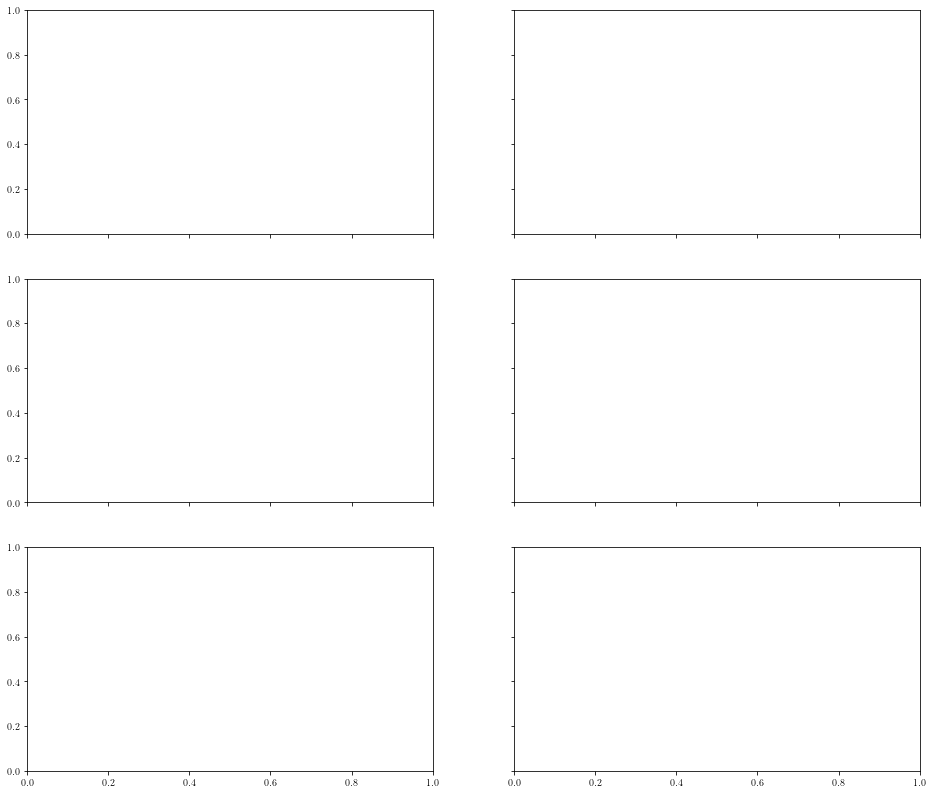

In [10]:
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
rc('text', usetex=True)
import dill
import numpy as np
import scipy as sp
# plt.rc('font', family='serif')
import pickle as pk

fig, ax = plt.subplots(3,2,sharex=True,sharey='row')
fig.set_size_inches((16,14))  
titles = ['Truncated','Untruncated']
ldir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/y3-3x2pt-methods/cosmosis/bf_new/'
for jf in range(3):
    r_0 = dill.load(open(ldir + fr0_all[jf],'rb'))
    ax[jf,0].plot(np.arange(len(r_0.weights)), r_0.weights, ls='',marker='.',color='k',ms=2.0)
    ax[jf,1].plot(np.arange(len(r_0.weights_trunc)), r_0.weights_trunc, ls='',marker='.',color='k',ms=2.0)

    for j in range(2):
        ax[jf,j].set_yscale('log')
        ax[jf,j].set_xlim(0.0,3000)
        ax[jf,j].set_ylim(1e-8,1e3)
#         ax[jf,j].text()
        # ax.axhline(1.0,ls='--',color='k',alpha=1.0,lw=2.0)
#         ax[jf,j].set_ylabel(titles[j],size=22)
    #     ax[j].set_xlabel('Element Number',size=22)
        ax[jf,j].tick_params(axis='both', which='major', labelsize=18)
        ax[jf,j].tick_params(axis='both', which='minor', labelsize=18)
        ax[jf,0].text( 0.1, 0.96,text[jf], verticalalignment='top', horizontalalignment='left', transform=ax[jf,0].transAxes,
                      fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[jf,0].text(x=0.1, y=0.96,s=text[jf])    

            
#     ax[j].set_title(titles[j],size=22)
# ax.legend(fontsize=18)





